<a href="https://colab.research.google.com/github/Logan-Bz/PHYS3025Work/blob/main/Homework_1%2C_Problem_5_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Python standard library
import time
import warnings

# Third-party software
import numpy as np

# Astropy
from astropy import coordinates as coord
from astropy import units as u
from astropy.table import Table

# Astroquery. This tutorial requires 0.3.5 or greater.
!pip install astroquery #note we need to install it manually using !pip install
import astroquery
from astroquery.vizier import Vizier
from astroquery.vo_conesearch import conf, conesearch, vos_catalog

from math import log

import matplotlib.pyplot as plt
%matplotlib inline

I just reused the imports from Weekly Activity 1 but replaced 'Simbad' with 'Vizier'.

<ipython-input-31-41c4421b430c>:13: RuntimeWarning: invalid value encountered in log
  Mv = Vmag + 5 - 5*np.log(np.divide(1,Plx))
<ipython-input-31-41c4421b430c>:15: RuntimeWarning: invalid value encountered in log10
  plt.scatter( BV , Mv ,c=np.log10(np.divide(1,Plx)))


Text(0, 0.5, 'Absolute Magnitude (V)')

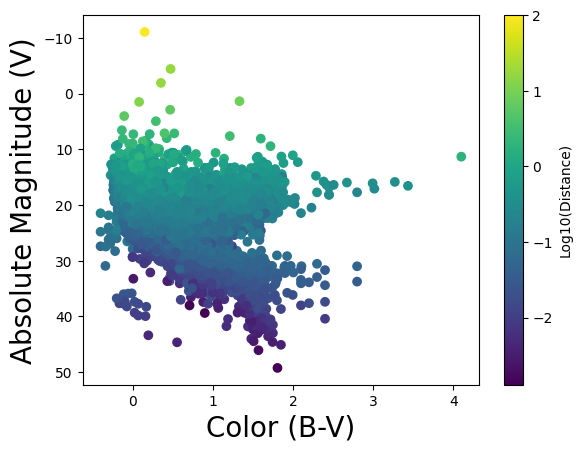

In [31]:
from numpy.core.numeric import identity
import array
v = Vizier( columns =[ 'B-V', 'Vmag', 'Plx', 'e_Plx' , 'SpType' , 'Lum' , 'Tc' ] , column_filters ={'VMag': '!='} , row_limit = -1)

result = v.query_constraints(catalog = 'V/137D')
BV = result[0]['B-V'].data.data
Vmag = result[0]['Vmag'].data.data
Plx = result[0]['Plx'].data.data
ePlx = result[0]['e_Plx'].data.data
ePlx = ePlx[(ePlx < 0.05*Plx)]
Stype = result[0]['SpType'].data.data

Mv = Vmag + 5 - 5*np.log(np.divide(1,Plx))

plt.scatter( BV , Mv ,c=np.log10(np.divide(1,Plx)))
cbar=plt.colorbar()
cbar.set_label('Log10(Distance)')
plt.ylim(reversed(plt.ylim())) # flip the y-axis
plt.xlabel("Color (B-V)", fontsize=20)
plt.ylabel("Absolute Magnitude (V)", fontsize=20)

<ipython-input-61-a9a1791b3071>:4: RuntimeWarning: invalid value encountered in log
  plt.scatter( np.log(Tc) , np.log(Lum) ,c=np.log10(np.divide(1,Plx)))
<ipython-input-61-a9a1791b3071>:4: RuntimeWarning: divide by zero encountered in log
  plt.scatter( np.log(Tc) , np.log(Lum) ,c=np.log10(np.divide(1,Plx)))
<ipython-input-61-a9a1791b3071>:4: RuntimeWarning: invalid value encountered in log10
  plt.scatter( np.log(Tc) , np.log(Lum) ,c=np.log10(np.divide(1,Plx)))


Text(0, 0.5, 'log(Luminosity)')

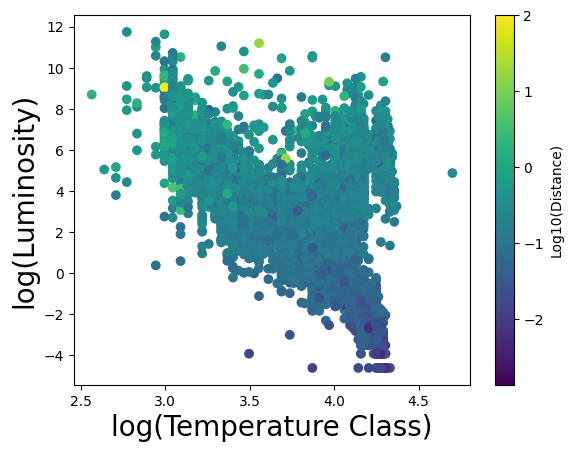

In [61]:
Lum = result[0]['Lum'].data.data
Tc = result[0]['Tc'].data.data

plt.scatter( np.log(Tc) , np.log(Lum) ,c=np.log10(np.divide(1,Plx)))
cbar=plt.colorbar()
cbar.set_label('Log10(Distance)')
plt.xlabel("log(Temperature Class)", fontsize=20)
plt.ylabel("log(Luminosity)", fontsize=20)

We get more or less the same trend for both graphs. We can at least see the main sequence trend in both graphs going form top left to bottom right.